In [6]:
df = pd.read_csv("./spam.csv", encoding = 'latin1')

In [7]:
import pandas as pd
import numpy as np

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5305,ham,\Hi missed your Call and my mumHas beendroppin...,NaN,NaN,NaN
4160,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
1100,ham,You busy or can I come by at some point and fi...,NaN,NaN,NaN
4490,ham,"My friend, she's studying at warwick, we've pl...",NaN,NaN,NaN
649,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",NaN,NaN,NaN


In [9]:
# 1. Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Renaming the columns for clarity
df.rename(columns = {'v1':'Spam Type','v2':'Messages'}, inplace = True)

In [13]:
df.sample(5)

,Spam Type,Messages
1617,ham,Did u download the fring app?
2190,ham,"Ooh, 4got, i'm gonna start belly dancing in mo..."
199,ham,"Found it, ENC &lt;#&gt; , where you at?"
2279,ham,"Sorry, I'll call later in meeting"
280,ham,You got called a tool?


In [14]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Spam Type'] = encode.fit_transform(df['Spam Type'])

In [15]:
df.head()

,Spam Type,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Check if there are any missing values in the dataset
df.isnull().sum()

Spam Type    0
Messages     0
dtype: int64

In [17]:
# Now check for duplicate values
df.duplicated().sum()

np.int64(403)

In [18]:
# Remove duplicates
df.drop_duplicates(keep = 'first')

,Spam Type,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [19]:
df.shape

(5572, 2)

## 2. EDA

In [20]:
df.head()

,Spam Type,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['Spam Type'].value_counts()

Spam Type
0    4825
1     747
Name: count, dtype: int64

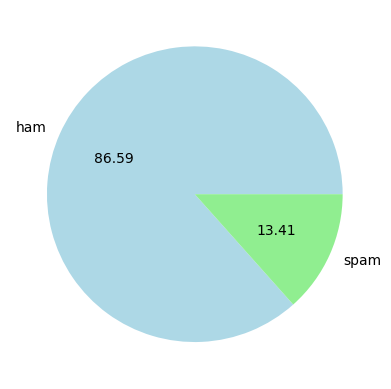

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['Spam Type'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f",colors=["lightblue","lightgreen"])
plt.show()

In [23]:
import nltk

In [24]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df['no. of characters'] = df['Messages'].apply(len)

In [26]:
df.head()

,Spam Type,Messages,no. of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# number of words
df['Number of Words'] = df['Messages'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,Spam Type,Messages,no. of characters,Number of Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['No. Of Sentences'] = df['Messages'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Spam Type,Messages,no. of characters,Number of Words,No. Of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['no. of characters', 'Number of Words', 'No. Of Sentences']].describe()

,no. of characters,Number of Words,No. Of Sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# For Ham Messages
df[df['Spam Type'] == 0][['no. of characters', 'Number of Words', 'No. Of Sentences']].describe()

,no. of characters,Number of Words,No. Of Sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# For Spam Messages
df[df['Spam Type'] == 1][['no. of characters', 'Number of Words', 'No. Of Sentences']].describe()

,no. of characters,Number of Words,No. Of Sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='no. of characters', ylabel='Count'>

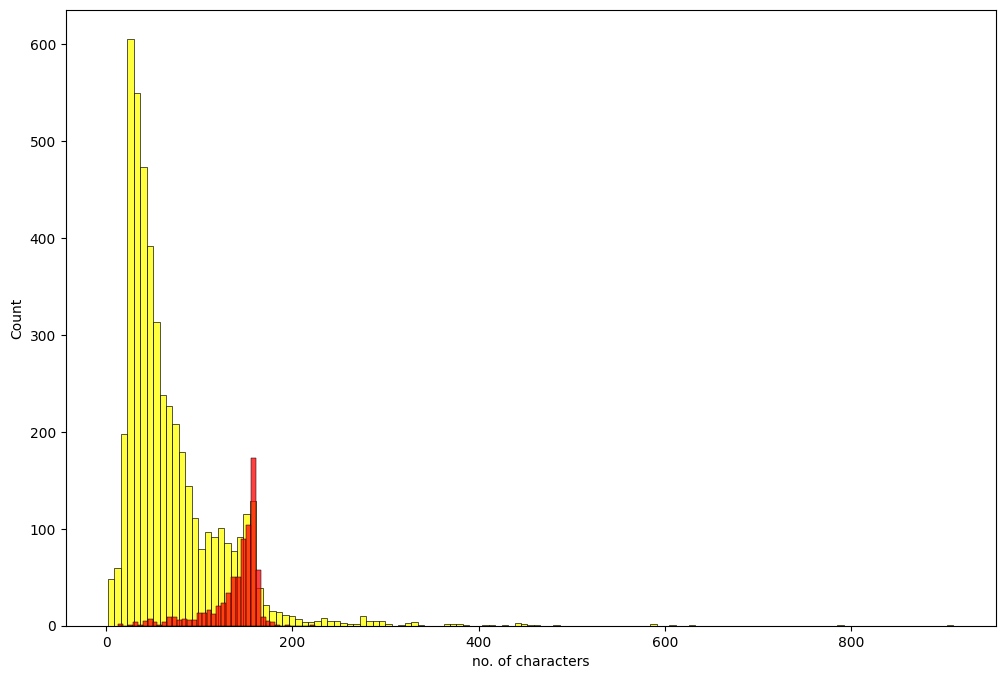

In [35]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df['Spam Type'] == 0]['no. of characters'], color = 'yellow')
sns.histplot(df[df['Spam Type'] == 1]['no. of characters'], color = 'red')

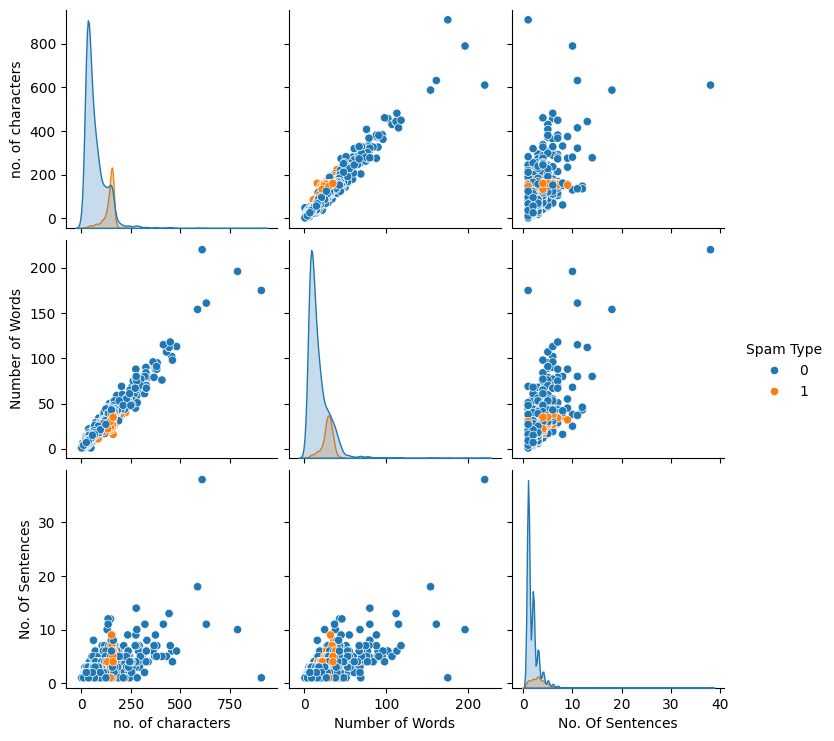

In [36]:
sns.pairplot(df, hue = 'Spam Type')

<Axes: >

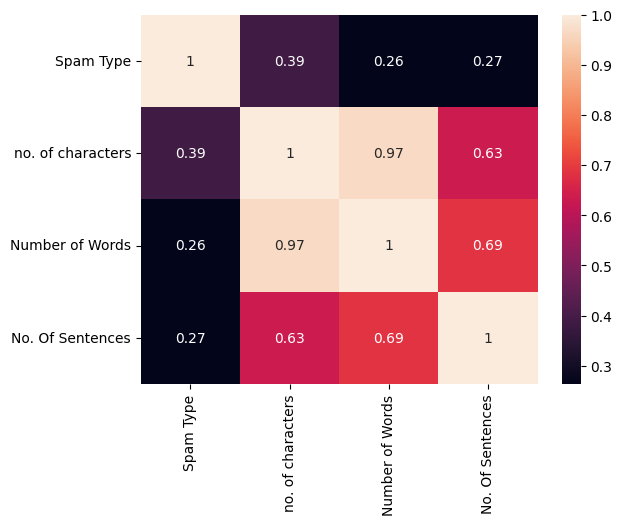

In [37]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [38]:
# Which one is the most closest. 0.39 :D

## 3. Data Processing
* Lower Case
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming

In [ ]:
def transform_msg(Messages):
    Messages = Messages.lower()
    Messages = nltk.word_tokenize(Messages)

    x = []
    for i in Messages:
        if i.isalnum(): 
            x.append(i)

    Messages  = x[:] 
    x.clear() # x = []

    for i in Messages:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)

    Messages  = x[:]
    x.clear() # x = []

    for i in Messages:
        x.append(ps.stem(i))   
    return " ".join(x)
        

In [ ]:
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Professional') 

'profession'

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
print(transform_msg('Nasar is 40% genius and 60%% dumb? He is a half-bad, half-good student'))
transform_msg("But i'll b going 2 sch on mon. My sis need 2 take smth. Beautifully and playing running")# test ????

nasar 40 geniu 60 dumb student


'b go 2 sch mon si need 2 take smth beauti play run'

In [43]:
df['Messages'][2000] # for checking

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [ ]:
df['Transformed Text'] = df['Messages'].apply(transform_msg) 

In [45]:
df.head()

,Spam Type,Messages,no. of characters,Number of Words,No. Of Sentences,Transformed Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [47]:
wc_spam = wc.generate(df[df['Spam Type'] == 1]['Transformed Text'].str.cat(sep = " ")) # I am -> Iam maybe???

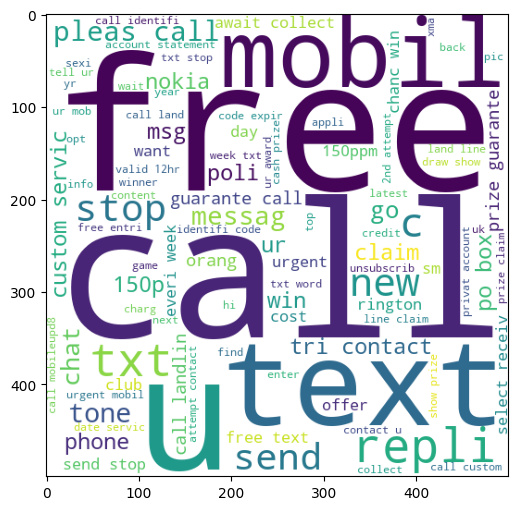

In [ ]:
plt.figure(figsize = (15,6))
plt.imshow(wc_spam)

In [ ]:
wc_hamspam = wc.generate(df[df['Spam Type'] == 0]['Transformed Text'].str.cat(sep = " ")) 

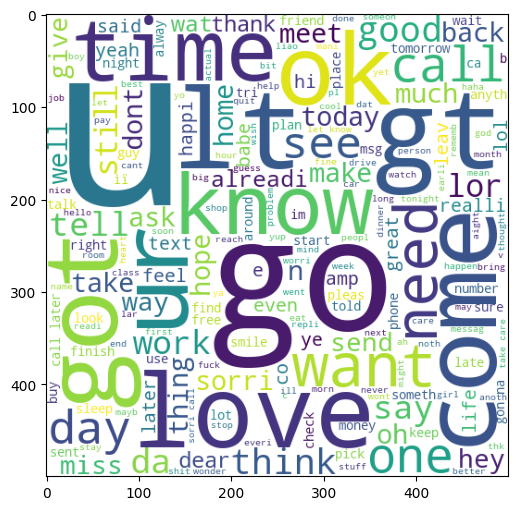

In [ ]:
plt.figure(figsize = (15,6))
plt.imshow(wc_hamspam)


In [51]:
df.head()

,Spam Type,Messages,no. of characters,Number of Words,No. Of Sentences,Transformed Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for message in df[df['Spam Type'] == 1]['Transformed Text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

11490

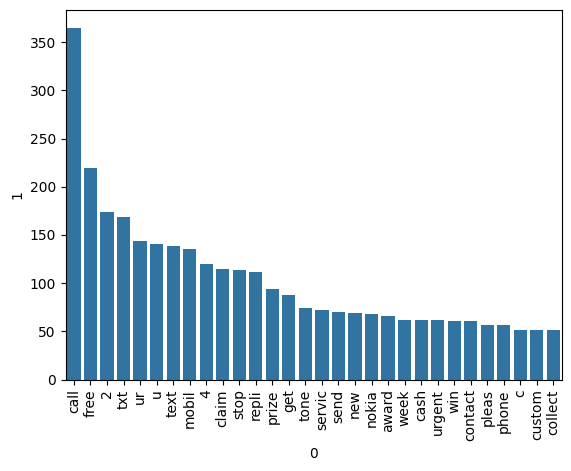

In [ ]:
from collections import Counter
sns.barplot(
    x=0,
    y=1,
    data=pd.DataFrame(Counter(spam_corpus).most_common(30))
)
plt.xticks(rotation=90)
plt.show()

In [ ]:

Notspam_corpus = []
for message in df[df['Spam Type'] == 0]['Transformed Text'].tolist():
    for word in message.split():
        Notspam_corpus.append(word)

In [ ]:
len(Notspam_corpus)


38221

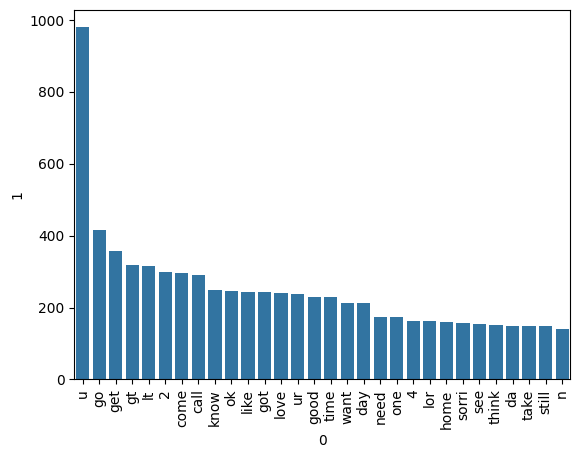

In [58]:
from collections import Counter
sns.barplot(
    x=0,
    y=1,
    data=pd.DataFrame(Counter(Notspam_corpus).most_common(30))
)
plt.xticks(rotation=90)
plt.show()

In [ ]:

df. head()

,Spam Type,Messages,no. of characters,Number of Words,No. Of Sentences,Transformed Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building (I love this)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cVec = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [62]:
X = tfidf.fit_transform(df['Transformed Text']).toarray()

In [63]:
X.shape

(5572, 3000)

In [64]:
y = df['Spam Type'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
gnb.fit(X_train, y_train)
y_predict1 = gnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_predict1) * 100, '%') 
print("Confusion Matrix: \n", confusion_matrix(y_test,y_predict1))


Accuracy Score:  85.2914798206278 %
Confusion Matrix: 
 [[818 147]
 [ 17 133]]
Precision Score:  47.5 %


In [ ]:
mnb.fit(X_train, y_train)
y_predict2 = mnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_predict2) * 100, '%') 
print("Confusion Matrix: \n", confusion_matrix(y_test,y_predict2))
print("Precision Score: ", precision_score(y_test,y_predict2) * 100, '%')


Accuracy Score:  97.75784753363229 %
Confusion Matrix: 
 [[965   0]
 [ 25 125]]
Precision Score:  100.0 %


In [ ]:
bnb.fit(X_train, y_train)
y_predict3 = bnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_predict3) * 100, '%') 
print("Confusion Matrix: \n", confusion_matrix(y_test,y_predict3))
print("Precision Score: ", precision_score(y_test,y_predict3) * 100, '%')
# LETS GOOOO 

Accuracy Score:  97.39910313901345 %
Confusion Matrix: 
 [[960   5]
 [ 24 126]]
Precision Score:  96.18320610687023 %


In [ ]:

!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [75]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC'      : svc,
    'KN'       : knc,
    'NB'       : mnb,
    'DT'       : dtc,
    'LR'       : lrc,
    'RF'       : rfc,
    'AdaBoost' : abc,
    'BgC'      : bc,
    'ETC'      : etc,
    'GBDT'     : gbdt,
    'xgb'      : xgb
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [80]:
train_classifier(svc,X_train,y_train,X_test,y_test)
#Too accurate :O

(0.9748878923766816, 0.9621212121212122)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy -  0.9748878923766816
Precision -  0.9621212121212122
For  KN
Accuracy -  0.9201793721973094
Precision -  1.0
For  NB
Accuracy -  0.9775784753363229
Precision -  1.0
For  DT
Accuracy -  0.9381165919282511
Precision -  0.900990099009901
For  LR
Accuracy -  0.947085201793722
Precision -  0.9252336448598131
For  RF
Accuracy -  0.9757847533632287
Precision -  1.0
For  AdaBoost
Accuracy -  0.9273542600896861
Precision -  0.8556701030927835
For  BgC
Accuracy -  0.967713004484305
Precision -  0.9130434782608695
For  ETC
Accuracy -  0.97847533632287
Precision -  0.9921875
For  GBDT
Accuracy -  0.9542600896860987
Precision -  0.9900990099009901
For  xgb
Accuracy -  0.9668161434977578
Precision -  0.9747899159663865


In [208]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000':accuracy_scores,'Precision_3000':precision_scores}).sort_values('Precision_3000',ascending=False)

In [ ]:
performance_df  

,Algorithm,Accuracy_3000,Precision_3000
1,KN,0.912108,1.000000
2,NB,0.963229,1.000000
5,RF,0.975785,1.000000
8,ETC,0.975785,0.992000
9,GBDT,0.957848,0.990476
0,SVC,0.974888,0.962121
10,xgb,0.970404,0.960630
7,BgC,0.971300,0.921429
4,LR,0.942601,0.905660
3,DT,0.944395,0.892857


In [210]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [211]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy_3000,0.912108
1,NB,Accuracy_3000,0.963229
2,RF,Accuracy_3000,0.975785
3,ETC,Accuracy_3000,0.975785
4,GBDT,Accuracy_3000,0.957848
5,SVC,Accuracy_3000,0.974888
6,xgb,Accuracy_3000,0.970404
7,BgC,Accuracy_3000,0.971300
8,LR,Accuracy_3000,0.942601
9,DT,Accuracy_3000,0.944395


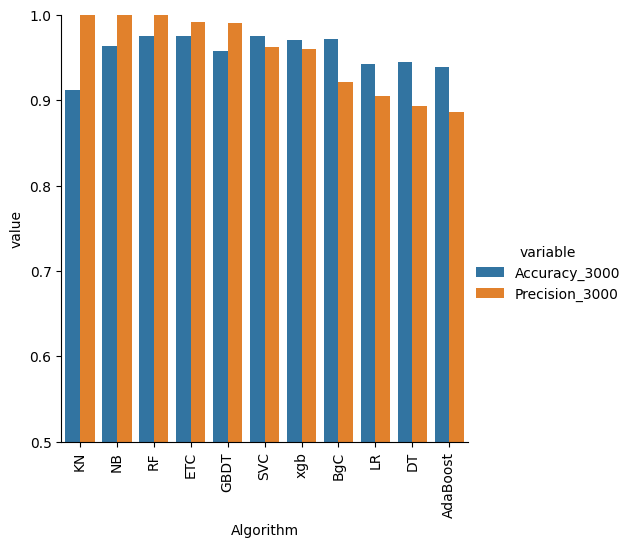

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show() 

In [219]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [220]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [222]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred)) 

Accuracy 0.97847533632287
Precision 0.9921875


In [177]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [178]:
from sklearn.ensemble import StackingClassifier

In [179]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))



In [225]:
df['Messages'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'